## A.About Dataset
    Using Boston dataset in sklearn 
    Purpose is predict column: MEDV

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.datasets import load_boston

% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load the dataset

In [ ]:
x = load_boston()
df = pd.DataFrame(x.data, columns= x.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df["MEDV"] = x.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.shape

(506, 14)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
X = df.drop("MEDV", 1)
y = df["MEDV"]

## 1.Filter Method(phuong phap loc)

Using Pearson Correslation

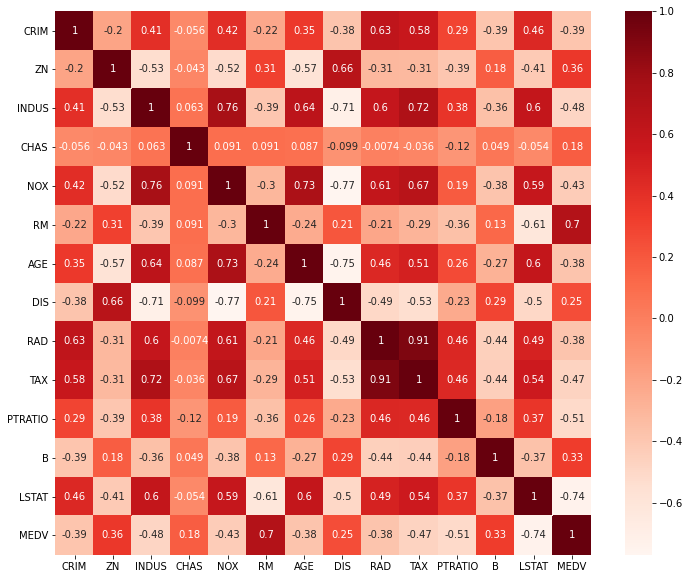

In [ ]:
plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Correlation with output variable

In [ ]:
cor_target = abs(cor["MEDV"])

Selecting hightly correlated features

In [ ]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

    Những biến trên có độ tương quan cao so với MEDV, nhưng không dừng lại ở đó, chứng ta cần 
    xem độ tương quan giữa các biến đó với nhau như nào thông qua headmap hoặc đoạn code sau

In [ ]:
print(df[["LSTAT", "PTRATIO"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000


In [ ]:
print(df[["LSTAT", "RM"]].corr())

          LSTAT        RM
LSTAT  1.000000 -0.613808
RM    -0.613808  1.000000


In [ ]:
print(df[["PTRATIO", "RM"]].corr())

          PTRATIO        RM
PTRATIO  1.000000 -0.355501
RM      -0.355501  1.000000


    Thông qua những dòng lệnh trên, ta có thể thấy rằng: biến RM và LSTSAT có tương quan cao (-0.6). Do đó, sẽ giữ lại một biến và loại bỏ biến khác. 
    Chọn LSTAT vì nó có độ tương cao với biến MEDV hơn.

## 2.Wrapper Method(Phương pháp gói)

    Loại bỏ ngược:
        Kiểm tra hiệu suất của mô hình, mỗi hiệu suất sẽ có tính năng giá trị. Nếu giá trị trên 0.05 thì loại bỏ, nếu không sẽ giữ lại.

In [ ]:
X_1 = sm.add_constant(X)

OLS-Bình phương nhỏ nhất thông thường

In [ ]:
model = sm.OLS(y, X_1).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

    Như chúng ta có thể thấy, biến AGE có giá trị cao nhất 9.58 lớn hơn 0.05 vì vậy sẽ loại bỏ nó.  Tương tự cho đến hết

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values [1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
    
    select_feature_BE = cols
    print(select_feature_BE)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


    Dùng phương pháp đệ qui đồng thời là sự đánh giá mô hình với những feature đó

In [ ]:
model = LinearRegression()

rfe = RFE(model, 7)
#chuyen doi du lieu
X_rfe = rfe.fit_transform(X, y)

#lap du lieu vao mo hinh
model.fit(X_rfe, y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]


    => Ở mô hình trên việc lựa chọn số 7 là ngẫu nhiên. Bây giờ là với 13 và lấy độ chính xác cao nhất

In [ ]:
# số feature trong biến X
nof_list = np.arange(1, 13)
hight_score = 0

nof = 0
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model = LinearRegression()
    rfe = RFE(model, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.fit_transform(X_test, y_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score>hight_score):
        hight_score = score
        nof = nof_list[n]
    
print("Số feature tối ưu: %d" %nof)
print("Điểm với %d feature: %f" %(nof, hight_score))

Số feature tối ưu: 9
Điểm 9 với feature: 0.649807


    Có 9 feature đã được tối ưu. Đồng thời ta cũng nhận được số điểm của model ở 9 feature đó.
    Giờ là lúc nhìn thấy tên của 9 feature đó.

In [ ]:
cols = list(X.columns)
model = LinearRegression()

rfe = RFE(model, 9)

X_rfe = rfe.fit_transform(X, y)

model.fit(X_rfe, y)
temp = pd.Series(rfe.support_, index=cols)
select_feature_rfe = temp[temp==True].index
print(select_feature_rfe)

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')


    => Và đó là những feature có ảnh hưởng đến MEDV nhất thông qua phương pháp gói

## 3. Embedded Method(phương pháp nhúng)

    Lặp lại mô hình hình và lọc ra feature có ảnh hưởng nhiều nhất tới model

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Chỉ số tốt nhất sử dụng LassoCV: %f" %reg.alpha_)
print("Điểm tốt nhất khi sử dụng LassoCV: %f" %reg.score(X, y))
coef = pd.Series(reg.coef_, index= X.columns)

Chỉ số tốt nhất sử dụng LassoCV: 0.724820
Điểm tốt nhất khi sử dụng LassoCV: 0.702444


In [ ]:
print("LassoCV đã chọn " + str(sum(coef!=0)) + " biến và loại bỏ " + str(sum(coef==0)) + " biến")

LassoCV đã chọn 10 biến và loại bỏ 3 biến


Text(0.5, 1.0, 'Feature được chọn khi sử dụng LassoCV')

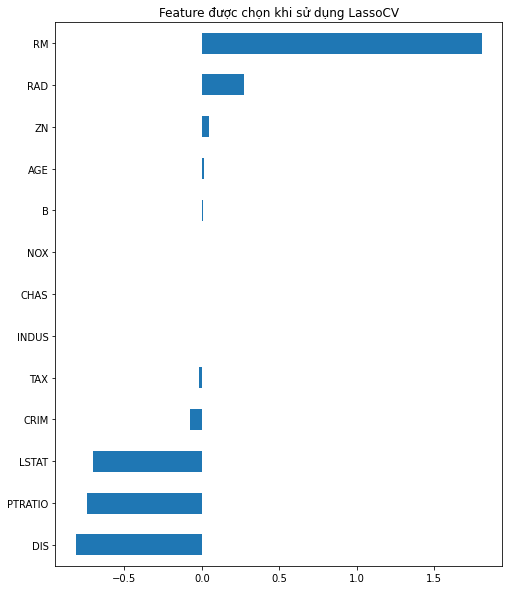

In [ ]:
imp_coef = coef.sort_values()
import matplotlib

matplotlib.rcParams['figure.figsize']=(8.0, 10.0)
imp_coef.plot(kind='barh')
plt.title("Feature được chọn khi sử dụng LassoCV")

    Nhận thấy rằng, phương pháp LassoCv nhận tất cả các feature trừ các feature: NOX, CHAS, INDUS

## 4.Tổng kết

    Có rất nhiều phương pháp đề chọn những feature phù hợp với mô hình học máy. Những phương pháp trên có những ưu điểm và nhược điểm riền của nó:
        1. Phương pháp lọc kém chính xác hơn. Nó hữu ích hơn khi dùng trong EDA, cũng kiểm tra sự tuyến tính trong dữ liệu.
        2. Phương pháp wrapper và embedded cho kết quả chính xác hơn. Nhưng chúng khó
            trong việc tính toán, nên phương pháp này phù hợp khi bộ dữ liệu có khoảng 20 feature